# Suicide Rate Prediction with Machine Learning


Suicide is a serious public health problem. The World Health Organization (WHO) estimates that every year close to 800 000 people take their own life, which is one person every 40 seconds and there are many more people who attempt suicide. Suicide occurs throughout the lifespan and was the second leading cause of death among 15-29-year-olds globally in 2016

The objective of this notebook is to predict the suicide rates using Machine Learning algorithms and analyzing them to find correlated factors causing increase in suicide rates globally.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data
3. Visualizing the data
4. Data Preprocessing & EDA
5. Splitting the data
6. Training the data
7. Model Performance Comparision
8. Conclusion

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016. This is a compiled dataset pulled from four other datasets linked by time and place from year 1985 to 2016. The source of those datasets is WHO, World Bank, UNDP and a dataset published in Kaggle.

The overview of this dataset is, it has 27820 samples with 12 features. Download the dataset from the link provided.

In [2]:
#Loading data into dataframe

data = pd.read_csv("suicide_data.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# 2. Familiarizing with Data:

In this step, few dataframe methods are used to look into the data and its features.

In [3]:
#Shape of dataframe

data.shape

(27820, 12)

In [4]:
#Listing the features of the dataset

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

In [6]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [7]:
data.age_group.value_counts()

15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: age_group, dtype: int64

In [8]:
data.generation.value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

**Observations:**

1. HDI for year column has missing values.
2. None of the other columns have any missing values.
3. So considering to remove HDI from the dataset.
4. The age feature has 6 unique age groups
5. Age is grouped into year buckets as categorical format which needs to be encoded.
6. Gender should be encoded.
7. Scale required numerical features.
8. The generation feature has 6 types of generations.
9. Generation could be encoded as well.


In [9]:
#Listing countries

country = data.country.unique()
print("Number of countries:", len(country))
country

Number of countries: 101


array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

# 3. Visualizing the data:

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'suicide_count'}>],
       [<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'suicide_rate'}>],
       [<AxesSubplot:title={'center':'HDI for year'}>,
        <AxesSubplot:title={'center':'gdp_per_capita'}>]], dtype=object)

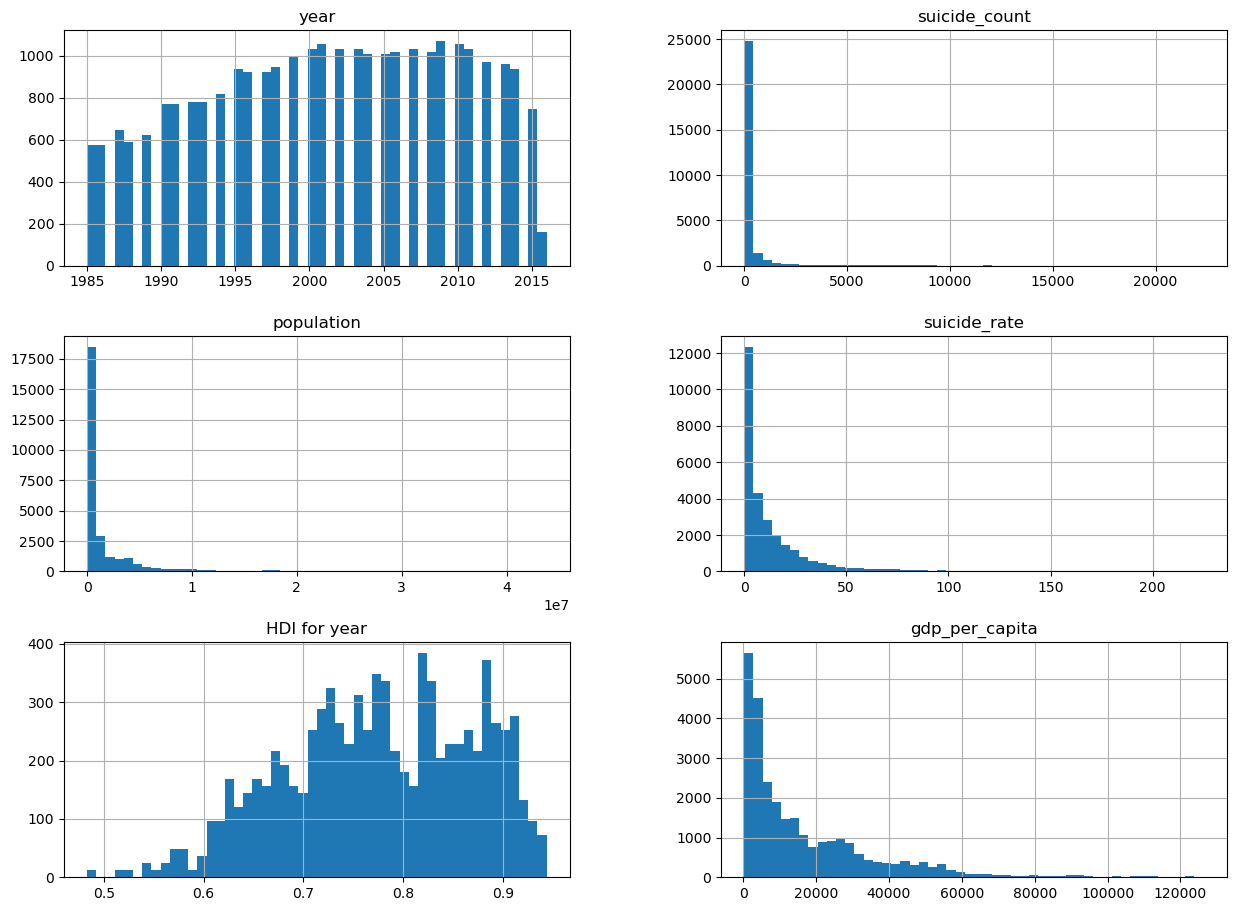

In [10]:
data.hist(bins = 50,figsize = (15,11))

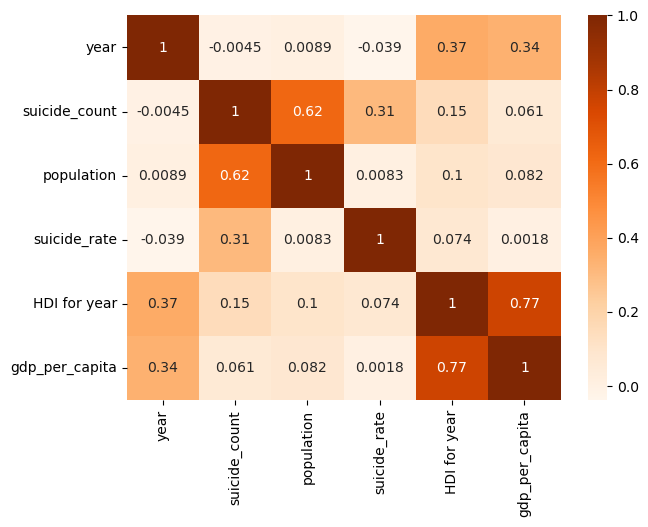

In [11]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True, cmap='Oranges')
plt.show()

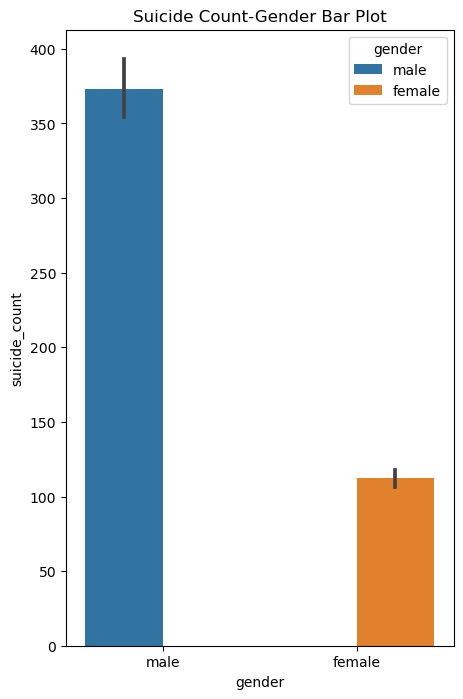

In [12]:
#Gender and suicide count bar plot

plt.figure(figsize=(5,8))
sns.barplot(x = "gender", y = "suicide_count", hue = "gender", data = data)
plt.title('Suicide Count-Gender Bar Plot')
plt.show()

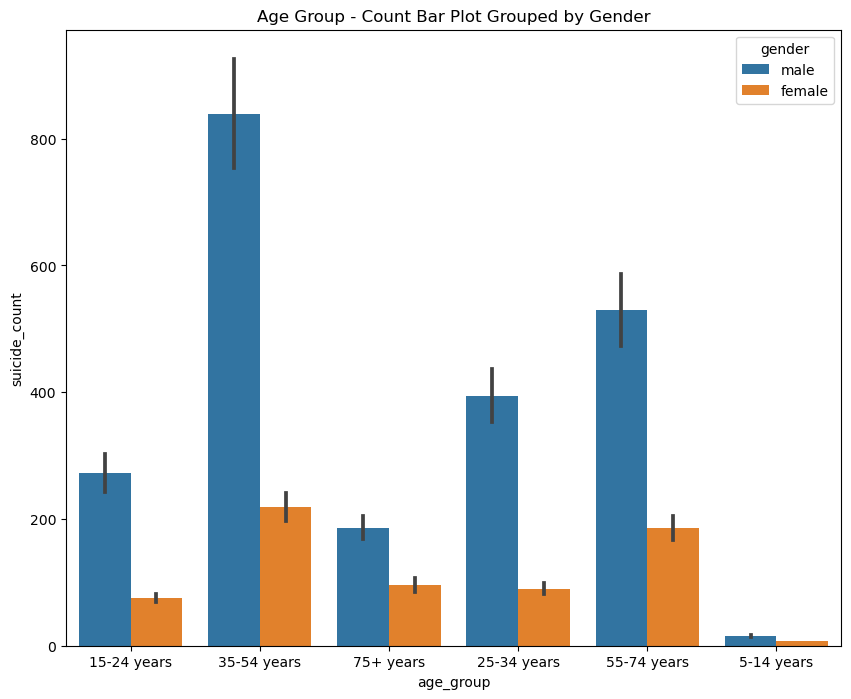

In [13]:
#Age Group - Count Bar Plot Grouped by Gender

plt.figure(figsize=(10,8))
sns.barplot(x = "age_group", y = "suicide_count", hue = "gender", data = data)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

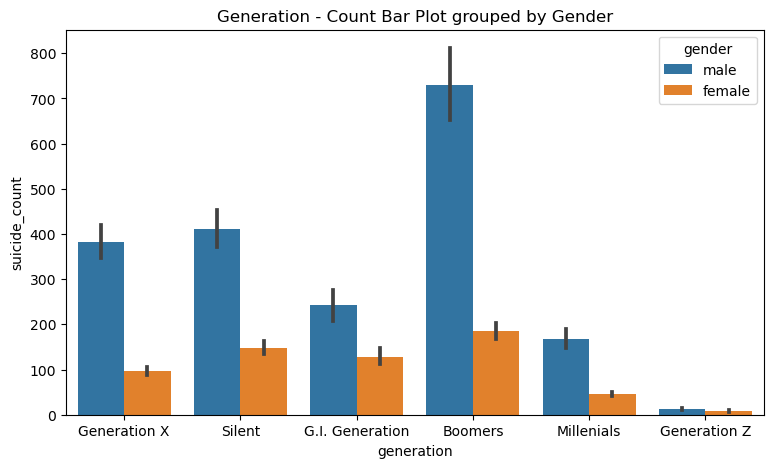

In [14]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = "generation", y = "suicide_count", hue = "gender", data = data)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

**From the above two bar plots, it is clear that men commit suicide considerably more than women irrespective of age group and generation they belong to.**

Now, lets check the suicide cases based on the age group.

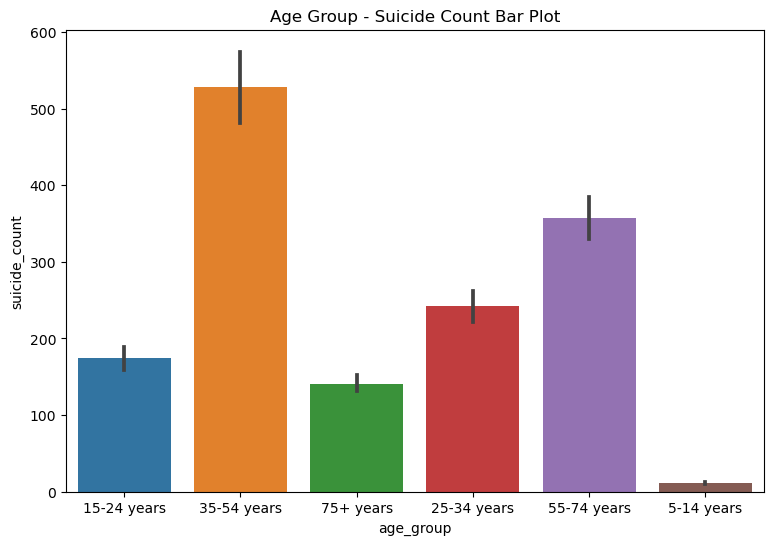

In [15]:
# Age Group and Suicide count bar plot

plt.figure(figsize=(9,6))
sns.barplot(x='age_group', y='suicide_count', data = data)
plt.title('Age Group - Suicide Count Bar Plot')
plt.show()

The above barplot shows that the suicide cases are more in the age group of 35-54 years followed by 55- 74 years. The surprising part is that the suicide cases in 5-14 year age group even though they are very less, mostly in tens.

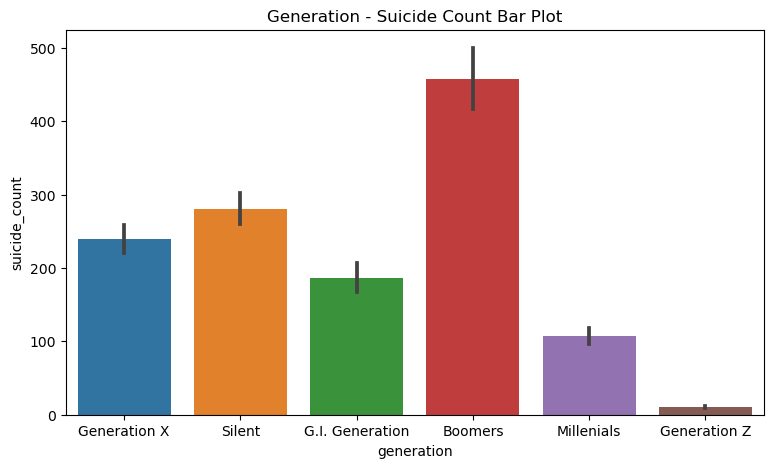

In [16]:
#Generation & Suicide Count Bar Plot

plt.figure(figsize=(9,5))
sns.barplot(x='generation', y='suicide_count',data=data)
plt.title('Generation - Suicide Count Bar Plot')
plt.show()

The above boxplot shows that the suicide cases are more in the boomers, silent and X generations. These generations are made up of people born until 1976 based on the details provided.

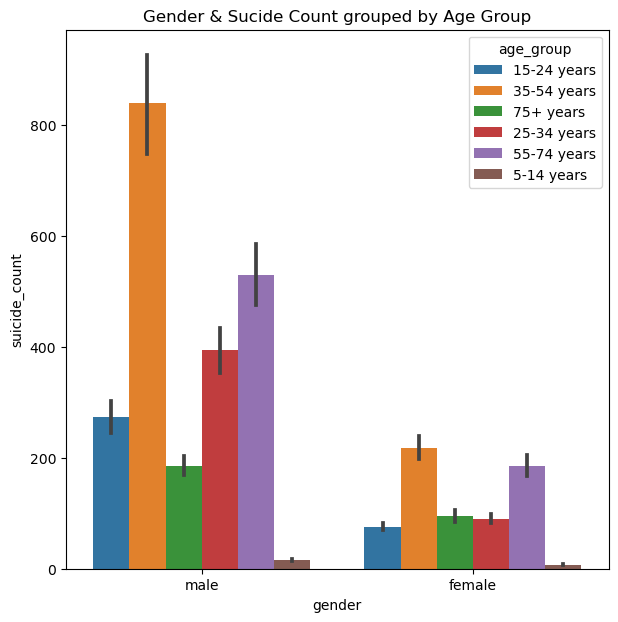

In [17]:
#Gender & Sucide Count grouped by Age Group bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="age_group", data=data)
plt.title('Gender & Sucide Count grouped by Age Group')
plt.show()

1. From the above graph, we can infer that 35-54 years age group is more prone to suicides irrespective of the gender frollowed by 55-74 years age group.
2. All together, it is obvious that males tend to commit suicide more than female.

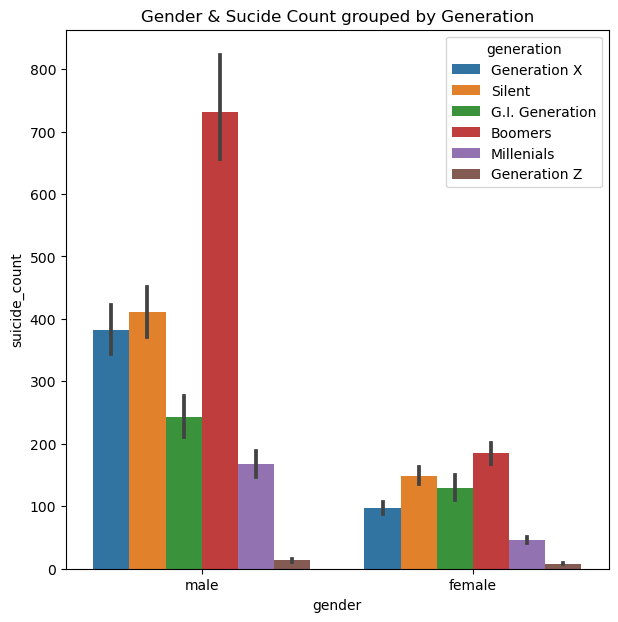

In [18]:
#Gender & Sucide Count grouped by Generation bar plot

plt.figure(figsize=(7,7))
sns.barplot(x="gender", y="suicide_count", hue="generation", data=data)
plt.title('Gender & Sucide Count grouped by Generation')
plt.show()

1. In the case of generation, the Bloomers generation had more suicide cases followed by Silent generation irrespective of the gender.
2. Even when considered generation, males are more prone to commit suicide.

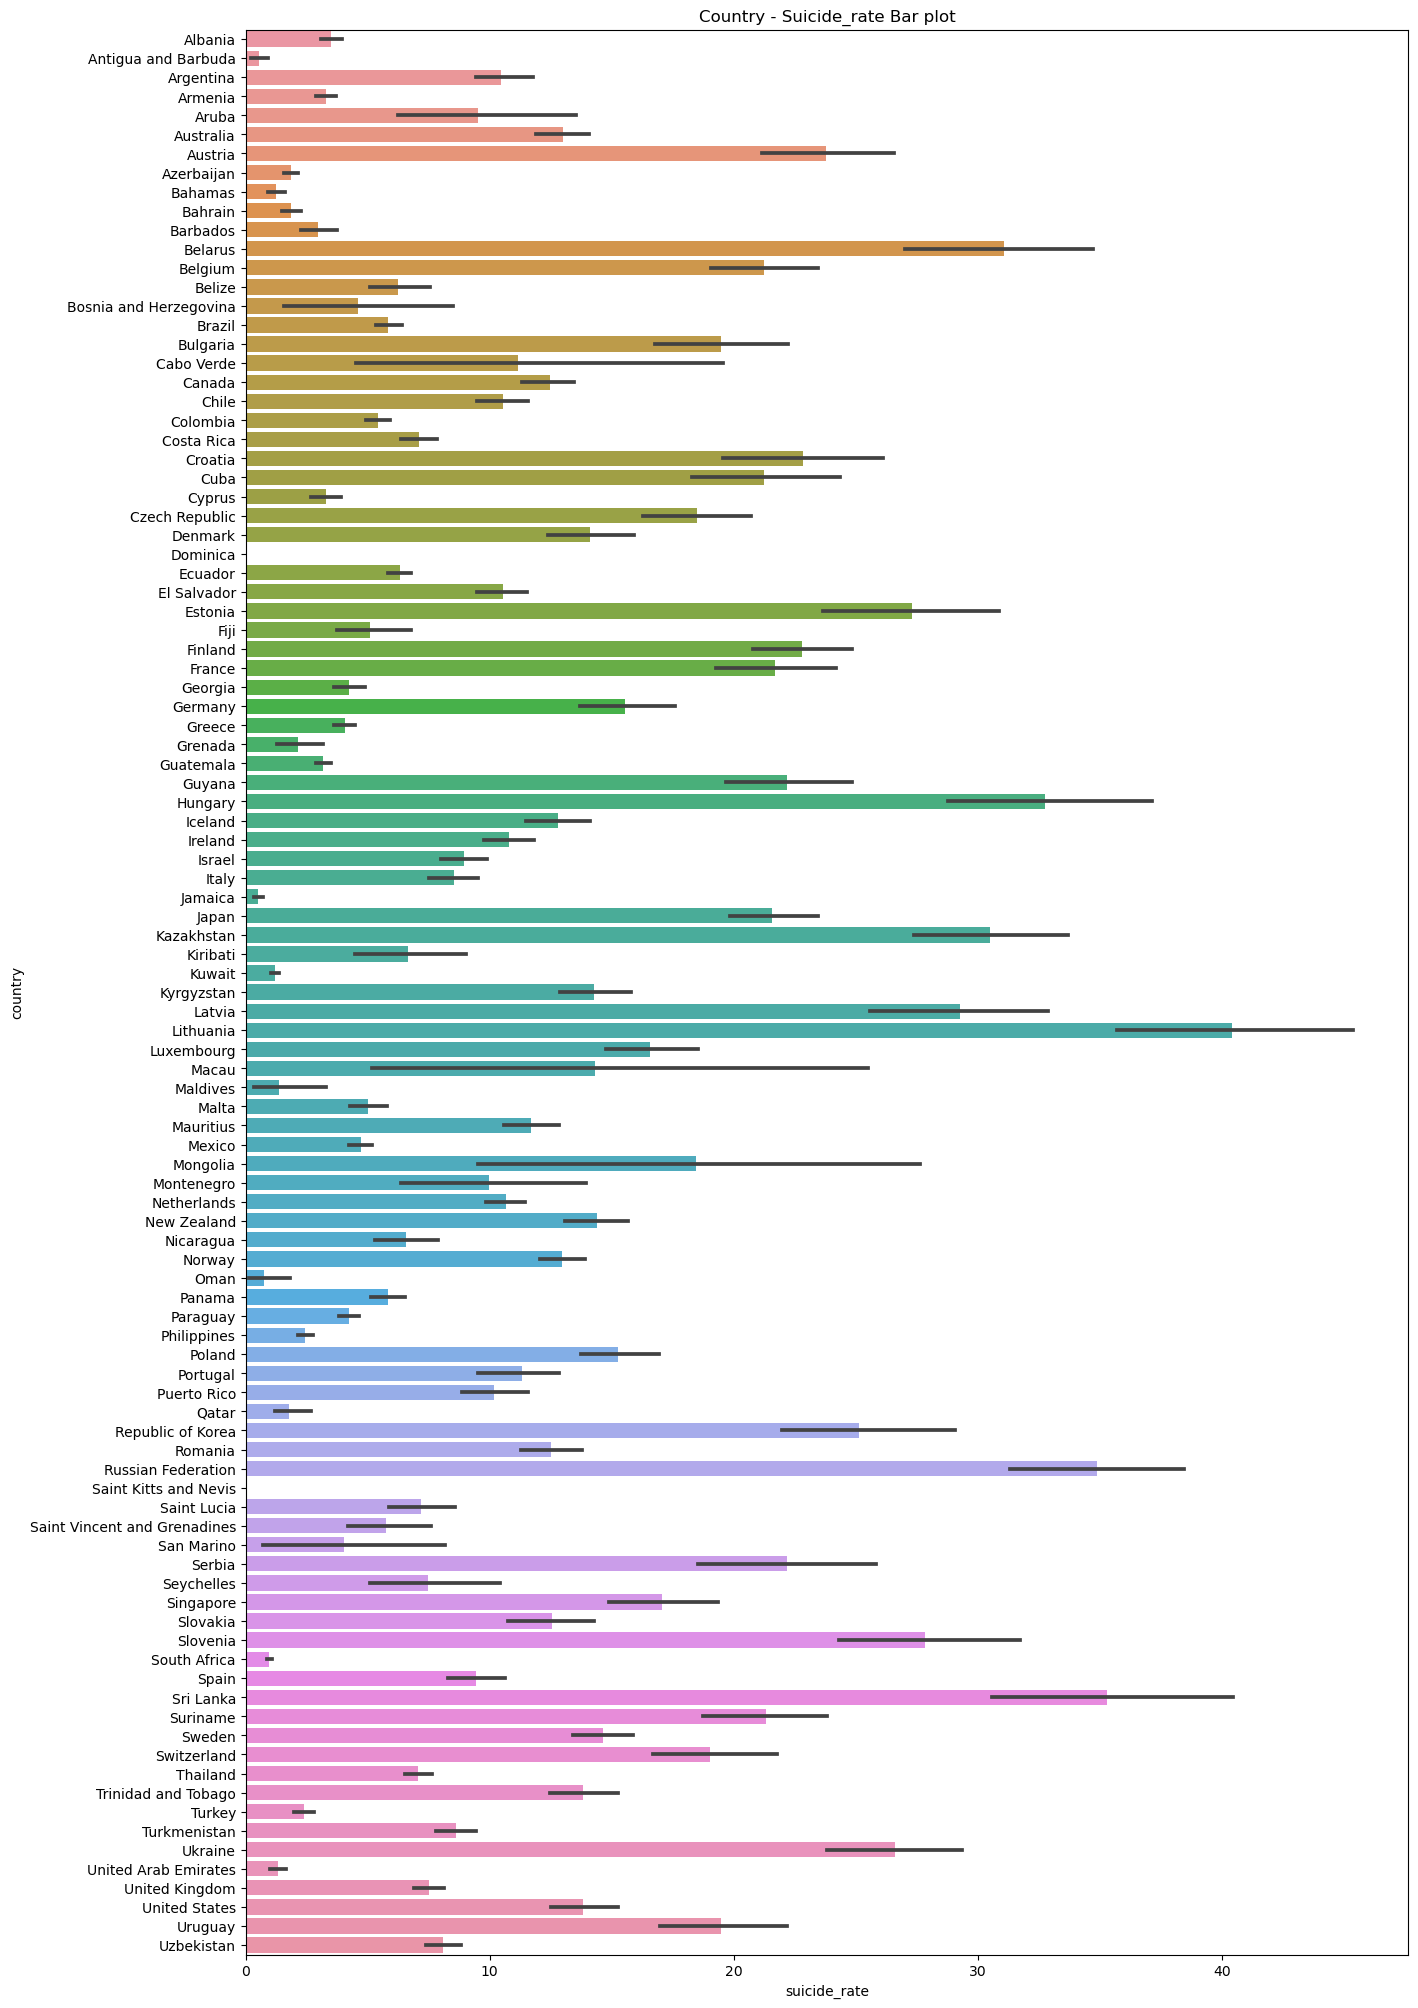

In [19]:
#Country & Suicide_rate Bar plot

plt.figure(figsize=(15,25))
sns.barplot(x = "suicide_rate", y = "country", data = data)
plt.title('Country - Suicide_rate Bar plot')
plt.show()

The above bar plot shows that the highest suicide rate country is Lithuania followed by Sri Lanka.

<AxesSubplot:xlabel='year'>

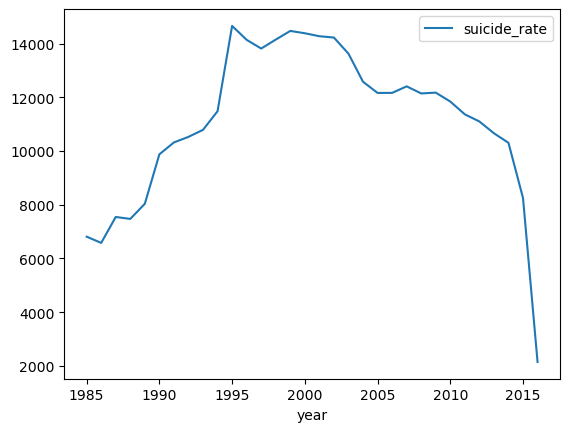

In [20]:
#Line plpot of year and suicide_rate

data[['year','suicide_rate']].groupby(['year']).sum().plot()

The observations from the above plot are that the suicide rate had grown rapidly from year 1990 & the rate of suicide has drastically reduced in year 2016. The dataset was collected during early 2016. So all the suicide cases of 2016 are not recorded in the dataset.

<Figure size 2000x1000 with 0 Axes>

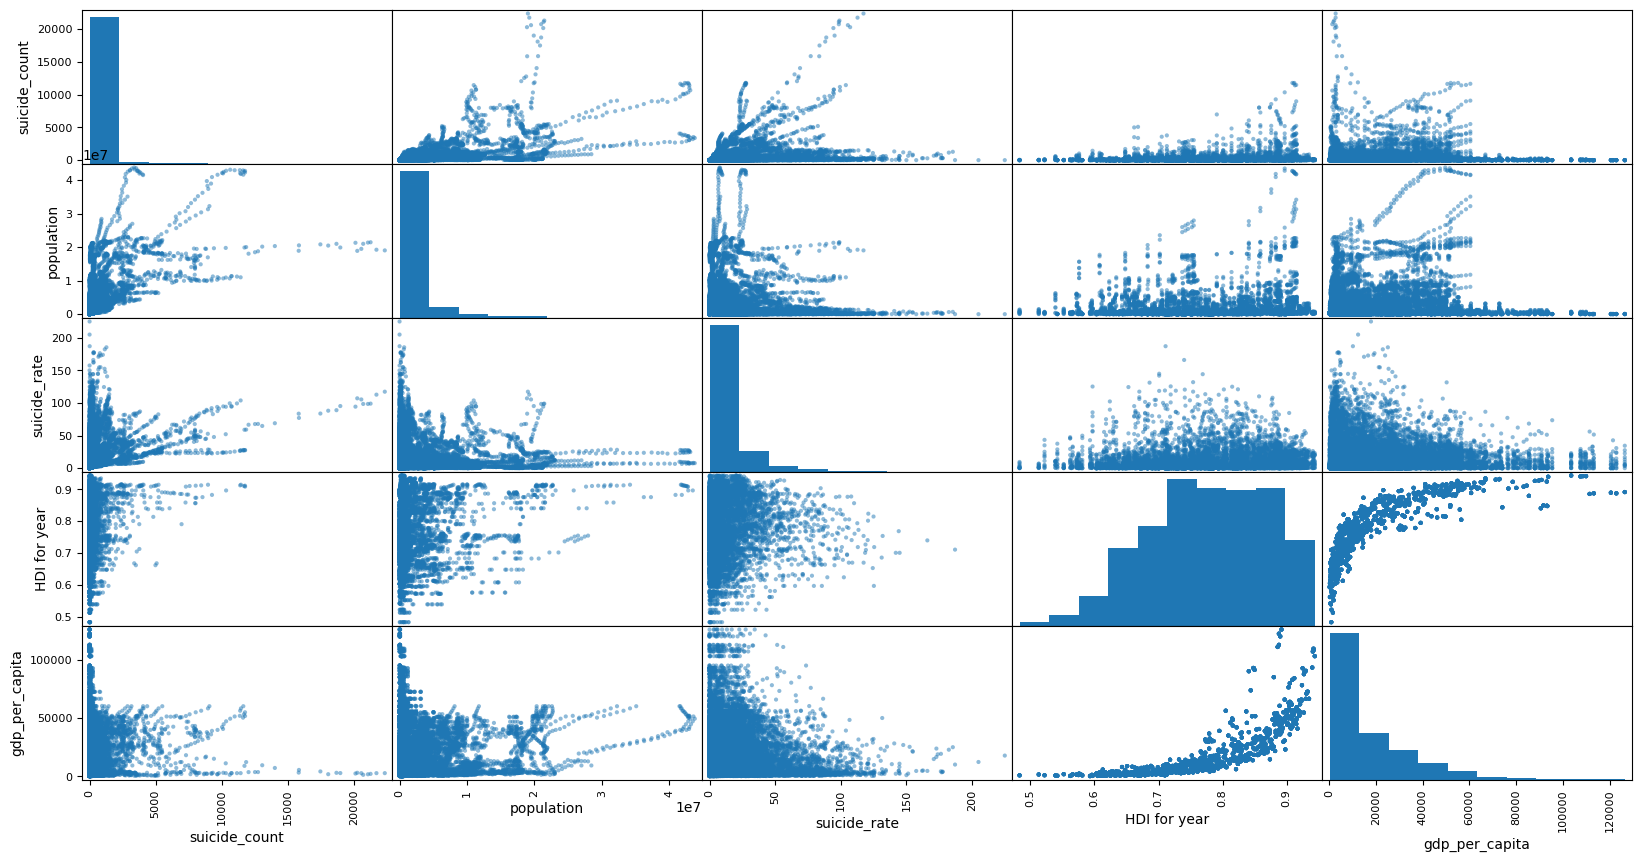

In [21]:
#Scatter matrix for checking outlier

plt.figure(figsize=(20,10))
attributes = ['suicide_count', 'population', 'suicide_rate','HDI for year', 
              'gdp_for_year','gdp_per_capita']
scatter_matrix(data[attributes], figsize=(20,10))
plt.show()

# 4. Data Preprocessing & EDA:

Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.



In [22]:
data.describe()

,year,suicide_count,population,suicide_rate,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [23]:
# checking info of data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         27820 non-null  object 
 1   year            27820 non-null  int64  
 2   gender          27820 non-null  object 
 3   age_group       27820 non-null  object 
 4   suicide_count   27820 non-null  int64  
 5   population      27820 non-null  int64  
 6   suicide_rate    27820 non-null  float64
 7   country-year    27820 non-null  object 
 8   HDI for year    8364 non-null   float64
 9   gdp_for_year    27820 non-null  object 
 10  gdp_per_capita  27820 non-null  int64  
 11  generation      27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


From data.info we come to know that there are null value in HDI for year.

In [24]:
##checking the data for unique values

data.nunique()

country             101
year                 32
gender                2
age_group             6
suicide_count      2084
population        25564
suicide_rate       5298
country-year       2321
HDI for year        305
gdp_for_year       2321
gdp_per_capita     2233
generation            6
dtype: int64

In [25]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64


From the above stats, it is clear that the column, HDI for year has 19456 null values out of 27820 samples which is approximately 70% of the column. This may tamper the model performance so, dropping the HDI for year column from the dataset.

In [26]:
#dropping the HDI for year column

data = data.drop(['HDI for year'], axis = 1)
data.shape

(27820, 11)

In [27]:
data.columns


Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

The column country-year is just a combination of country and year columns. So dropping that column.

In [28]:
#dropping the country-year for year column

data = data.drop(['country-year'], axis = 1)
data.shape

(27820, 10)

Now we are going further with 10 features which also include the target column. For further assurance, lets drop all the null rows from the dataset.

In [29]:
#droppinf off any null rows (is any)

data = data.dropna()
data.shape

(27820, 10)

In [30]:
#checking for outlier and removing it

data=data.sort_values(by=["suicide_rate"])
q1=data["suicide_rate"].quantile(0.25)
q3=data["suicide_rate"].quantile(0.75)
iqr=q3-q1
lwo=q1-1.5*iqr
upo=q3+1.5*iqr
data=data[(data.suicide_rate<upo)&(data.suicide_rate>lwo)]
data=data.sort_index().reset_index(drop=True)
data.shape

(25774, 10)

In [77]:
#creating a copy of dataset for statistical test
stat_data = data.copy()
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
25769,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
25770,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
25771,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
25772,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


The non-numerical labeled columns, country, year, gender, age_group and generation are to be converted to numerical labels that can be done by using SkLearn's LabelEncoder.

In [32]:
#encoding the categorical features with LabelEncoder

from sklearn.preprocessing import LabelEncoder
import pickle
file = open('pickle/label.pkl', 'wb')
categorical = ['country','year','age_group', 'gender', 'generation']
dict= {}

for column in categorical:
    le = LabelEncoder()
    le.fit(stat_data[column])
    # dump information to that file
    dict[column] = le
    stat_data[column] = le.transform(stat_data[column])
pickle.dump(dict, file)
file.close()

In [33]:
#opening pickled file

file = open('pickle/label.pkl', "rb")
label = pickle.load(file)
label

{'country': LabelEncoder(),
 'year': LabelEncoder(),
 'age_group': LabelEncoder(),
 'gender': LabelEncoder(),
 'generation': LabelEncoder()}

In [34]:
stat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25774 entries, 0 to 25773
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         25774 non-null  int32  
 1   year            25774 non-null  int64  
 2   gender          25774 non-null  int32  
 3   age_group       25774 non-null  int32  
 4   suicide_count   25774 non-null  int64  
 5   population      25774 non-null  int64  
 6   suicide_rate    25774 non-null  float64
 7   gdp_for_year    25774 non-null  object 
 8   gdp_per_capita  25774 non-null  int64  
 9   generation      25774 non-null  int32  
dtypes: float64(1), int32(4), int64(4), object(1)
memory usage: 1.6+ MB


In [35]:
#Checking the data type of each column

stat_data.dtypes

country             int32
year                int64
gender              int32
age_group           int32
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int32
dtype: object

In [36]:
# Converting the column 'gdp_for_year' to float from object

stat_data['gdp_for_year'] = stat_data['gdp_for_year'].str.replace(',','').astype(float)


Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data. So, the numerical columns, population, gdp_for_year & gdp_per_capita are being standardized using SkLearn's RobustScalar.

In [37]:
#description of dataset

stat_data.describe().T

,count,mean,std,min,25%,50%,75%,max
country,25774.0,4.900237e+01,2.949350e+01,0.0,2.300000e+01,4.700000e+01,7.400000e+01,1.000000e+02
year,25774.0,1.630973e+01,8.505488e+00,0.0,1.000000e+01,1.700000e+01,2.400000e+01,3.100000e+01
gender,25774.0,4.630636e-01,4.986435e-01,0.0,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
age_group,25774.0,2.408318e+00,1.682575e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00
suicide_count,25774.0,1.777423e+02,5.933664e+02,0.0,2.000000e+00,2.000000e+01,1.050000e+02,1.176700e+04
population,25774.0,1.854543e+06,3.934928e+06,278.0,9.704875e+04,4.411165e+05,1.507493e+06,4.380521e+07
suicide_rate,25774.0,8.547500e+00,9.613651e+00,0.0,7.100000e-01,4.990000e+00,1.328000e+01,4.016000e+01
gdp_for_year,25774.0,4.475355e+11,1.477638e+12,46919625.0,8.680472e+09,4.811469e+10,2.620076e+11,1.812071e+13
gdp_per_capita,25774.0,1.710801e+04,1.914534e+04,251.0,3.492000e+03,9.456000e+03,2.519100e+04,1.263520e+05
generation,25774.0,2.705207e+00,1.787342e+00,0.0,1.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00


In [38]:
#Scaling the numerical data columns with RobustScalar

numerical = ['suicide_count', 'population', 'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
stat_data[numerical] = rc.fit_transform(stat_data[numerical])

In [39]:
import pickle
pickle.dump(rc, open('pickle/robust.pkl', "wb"))

In [40]:
# Sepratating & assigning features and target columns to X & y

y = stat_data['suicide_rate']
X = stat_data.drop('suicide_rate',axis=1)
X.shape, y.shape

((25774, 9), (25774,))

In [41]:
stat_data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,0.009709,-0.090905,6.71,-0.181418,-0.399097,2
1,0,2,1,2,-0.038835,-0.094379,5.19,-0.181418,-0.399097,5
2,0,2,0,0,-0.058252,-0.107354,4.83,-0.181418,-0.399097,2
3,0,2,1,5,-0.184466,-0.297294,4.59,-0.181418,-0.399097,1
4,0,2,1,1,-0.106796,-0.118272,3.28,-0.181418,-0.399097,0
...,...,...,...,...,...,...,...,...,...,...
25769,100,29,0,2,0.844660,2.254407,2.96,0.059024,-0.329370,2
25770,100,29,0,5,-0.106796,-0.065690,2.58,0.059024,-0.329370,5
25771,100,29,1,3,0.388350,1.645610,2.17,0.059024,-0.329370,3
25772,100,29,0,3,0.233010,1.553045,1.67,0.059024,-0.329370,3


# 5. Splitting the Data:

The data is split into train & test sets, 80-20 split.

In [42]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((20619, 9), (5155, 9))

# 6. Model Building & Training:

Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide rate is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:



1. Linear Regression
2. Decision Tree
3. Random Forest
4. k-Nearest Neighbors Regression
5. Bagging Regression

The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

In [43]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [44]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  rmse_train.append(round(c, 3))
  rmse_test.append(round(d, 3))

# 6.1. Linear Regression

Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method for regression. Linear regression finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [45]:
# Linear regression model 
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
# fit the model 
lr.fit(X_train, y_train)

LinearRegression()

In [46]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

**Performance Evaluation:**

In [47]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.284
Linear Regression: Accuracy on test Data: 0.274

Linear Regression: The RMSE of the training set is: 8.17862820769805
Linear Regression: The RMSE of the testing set is: 8.005812687898015


**Storing Results:**

In [48]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Linear Regression', acc_train_lr, acc_test_lr, rmse_train_lr, rmse_test_lr)


In [49]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Ridge(alpha=1.0))
])

# Define the hyperparameter grid
param_grid = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Fit the model using cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions using the best model
y_test_lr = grid_search.predict(X_test)
y_train_lr = grid_search.predict(X_train)

# Compute the accuracy of the model performance
acc_train_lr = grid_search.score(X_train, y_train)
acc_test_lr = grid_search.score(X_test, y_test)

# Compute the root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Ridge Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Ridge Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nRidge Regression: The RMSE of the training set is:', rmse_train_lr)
print('Ridge Regression: The RMSE of the testing set is:', rmse_test_lr)


Ridge Regression: Accuracy on training Data: 0.284
Ridge Regression: Accuracy on test Data: 0.274

Ridge Regression: The RMSE of the training set is: 8.178629841464344
Ridge Regression: The RMSE of the testing set is: 8.005684029205753


Text(0.5, 1.0, 'Actual vs Predicted Training Set')

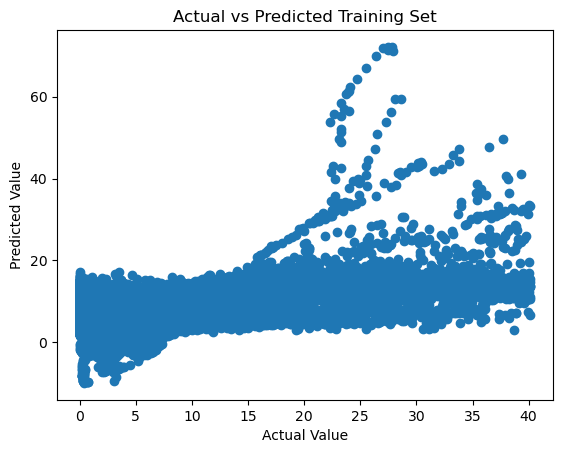

In [50]:
plt.scatter(y_train,y_train_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Training Set")

Text(0.5, 1.0, 'Actual vs Predicted Testing Set')

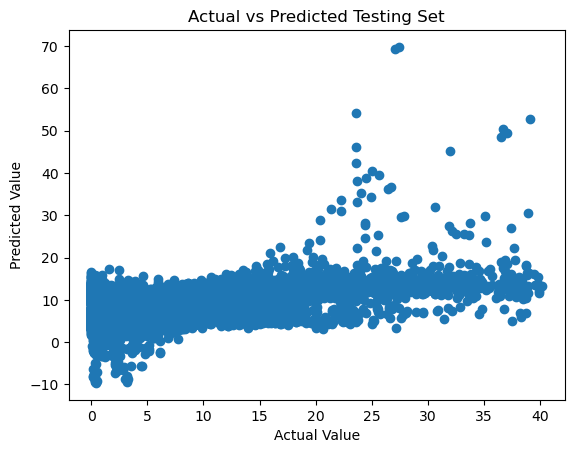

In [51]:
plt.scatter(y_test,y_test_lr)
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted Testing Set")

**OBSERVATIONS:**

The model preformance is not very good, also we perform hyperparameter but we can see that the scores on the training and test sets are very close together. This means we are likely underfitting, not overfitting. That's why this model is not good for the project.

# 6.2. Decision Trees: Regression


Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [52]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

# instantiate the model 
tree = DecisionTreeRegressor(max_depth=9)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=9)

In [53]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

Performance Evaluation:

In [54]:
#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train, y_train)
acc_test_tree = tree.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 0.976
Decision Tree: Accuracy on test Data: 0.969

Decision Tree: The RMSE of the training set is: 1.49820960521051
Decision Tree: The RMSE of the testing set is: 1.6534177818890963


**Storing Results:**

In [55]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree',acc_train_tree, acc_test_tree, rmse_train_tree, rmse_test_tree)


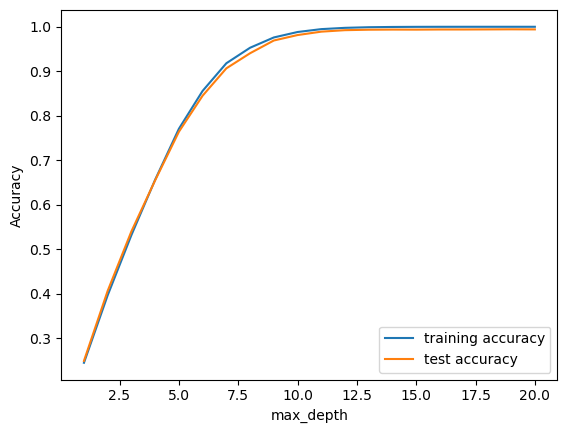

In [56]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  tree = DecisionTreeRegressor(max_depth=n)
  tree.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(tree.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(tree.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

Evaluating training and testing set performance with different numbers of max_depth from 1 to 20. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis.

**OBSERVATIONS:**

Decision tree is better than other regression model as it gives 96.9% accuracy, also as max depth increases accuracy of model increases.

# 6.3. Random Forest: Ensemble of Decision Trees

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [57]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
forest = RandomForestRegressor(max_depth=9)

# fit the model 
forest.fit(X_train, y_train)

RandomForestRegressor(max_depth=9)

In [58]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [59]:
#computing the accuracy of the model performance
acc_train_forest = forest.score(X_train, y_train)
acc_test_forest = forest.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)


Random Forest: Accuracy on training Data: 0.992
Random Forest: Accuracy on test Data: 0.988

Random Forest: The RMSE of the training set is:  0.889727275085349
Random Forest: The RMSE of the testing set is:  1.0264402780640796


In [60]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest',acc_train_forest, acc_test_forest, rmse_train_forest, rmse_test_forest)

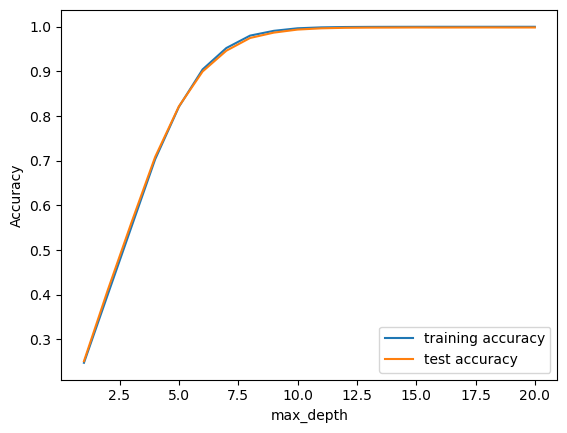

In [61]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1, 21)
for n in depth:
  # fit the model
  forest = RandomForestRegressor(max_depth=n)
  forest.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(forest.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(forest.score(X_test, y_test))

#plotting the training & testing accuracy for max_depth from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend()

Evaluating training and testing set performance with different numbers of max_depth from 1 to 20. The plot shows the training and test set accuracy on the y-axis against the setting of max_depth on the x-axis

**OBSERVATIONS:**

The random forest gives us an accuracy of 99.2%, better than the linear models or a single decision tree, without tuning any parameters. But this might also be a case of overfitting. So, the parameter are tuned and the finalized model has an accuracy of 98% which is better than the linear & decision tree models.

# 6.4. k-Nearest Neighbors Regression:

K nearest neighbors is a simple algorithm that stores all available cases and predict the numerical target based on a similarity measure (e.g., distance functions). A simple implementation of KNN regression is to calculate the average of the numerical target of the k nearest neighbors.

In [62]:
# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

# instantiate the model
knn = KNeighborsRegressor()

param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

# instantiate the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

# fit the model 
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [63]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 2, 'weights': 'distance'}


In [64]:
#predicting the target value from the model for the samples
y_train_knn = knn_grid.predict(X_train)
y_test_knn = knn_grid.predict(X_test)

**Performance Evaluation:**

In [65]:
#computing the accuracy of the model performance
acc_train_knn = knn_grid.score(X_train, y_train) 
acc_test_knn = knn_grid.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_knn = np.sqrt(mean_squared_error(y_train, y_train_knn))
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN: Accuracy on test Data: {:.3f}".format(acc_test_knn))
print('\nKNN: The RMSE of the training set is:', rmse_train_knn)
print('KNN: The RMSE of the testing set is:', rmse_test_knn)

KNN: Accuracy on training Data: 1.000
KNN: Accuracy on test Data: 0.732

KNN: The RMSE of the training set is: 0.0
KNN: The RMSE of the testing set is: 4.862355277515545


**Storing Results:**

In [66]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('k-Nearest Neighbors Regression', acc_train_knn, acc_test_knn, rmse_train_knn, rmse_test_knn)


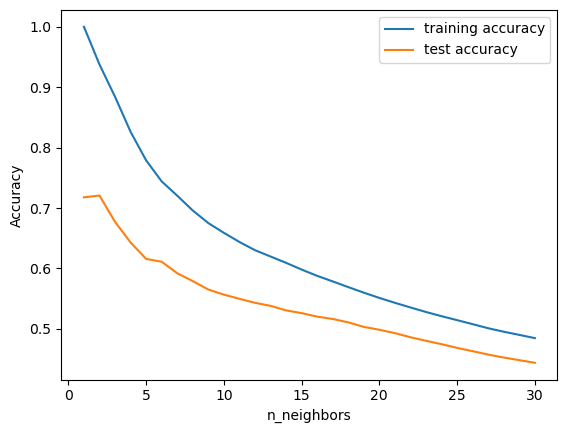

In [67]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 31)
for n in neighbors_settings:
  # fit the model
  knn = KNeighborsRegressor(n_neighbors=n)
  knn.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(knn.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(knn.score(X_test, y_test))

#plotting the training & testing accuracy for n_neighbours from 1 to 30
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()

**OBSERVATIONS:**

This discrepancy between performance on the training set and the testing set for n_neighbors < 5 is a clear sign of overfitting. After that, the perfromance is not so great so, moving on to the other models.

# 6.5. Bagging Regression:

Bagging Regressor is an ensemble estimator which fits base estimator on each random subset of the Train dataset and then aggregates their individual predictions to form a final prediction using voting or averaging method. Here the base estimator is Decision Trees.

In [68]:
#Bagging Regression model
from sklearn.ensemble import BaggingRegressor

#instantiate the model
br = BaggingRegressor(n_estimators=10)

#fit the model
br.fit(X_train, y_train)

BaggingRegressor()

In [69]:
#predicting the target value from the model for the samples
y_test_br = br.predict(X_test)
y_train_br = br.predict(X_train)

**Performance Evaluation:**

In [70]:
#computing the accuracy of the model performance
acc_train_br = br.score(X_train, y_train)
acc_test_br = br.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_br = np.sqrt(mean_squared_error(y_train, y_train_br))
rmse_test_br = np.sqrt(mean_squared_error(y_test, y_test_br))

print("Bagging Regression: Accuracy on training Data: {:.3f}".format(acc_train_br))
print("Bagging Regression: Accuracy on test Data: {:.3f}".format(acc_test_br))
print('\nBagging Regression: The RMSE of the training set is: ', rmse_train_br)
print('Bagging Regression: The RMSE of the testing set is: ', rmse_test_br)

Bagging Regression: Accuracy on training Data: 0.999
Bagging Regression: Accuracy on test Data: 0.997

Bagging Regression: The RMSE of the training set is:  0.23839756632861825
Bagging Regression: The RMSE of the testing set is:  0.4918690293137597


**Storing Results:**

In [71]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Bagging Regression',acc_train_br, acc_test_br, rmse_train_br, rmse_test_br)


Evaluating training and testing set performance with different numbers of n_estimators from 1 to 30. The plot shows the training and test set accuracy on the y-axis against the setting of n_estimators on the x-axis.

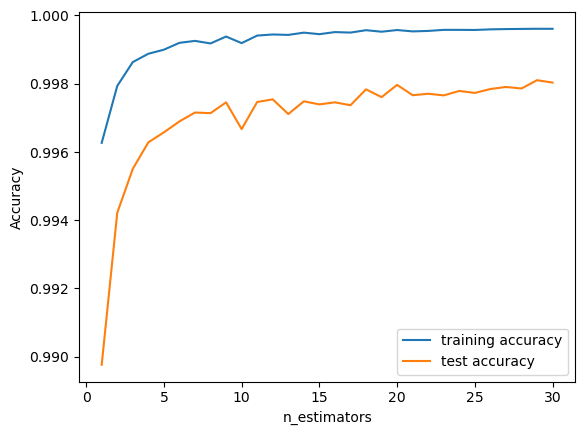

In [72]:
training_accuracy = []
test_accuracy = []
# try n_estimators from 1 to 30
est = range(1, 31)
for n in est:
  # fit the model
  br = BaggingRegressor(n_estimators=n)
  br.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(br.score(X_train, y_train))
  # record generalization accuracy
  test_accuracy.append(br.score(X_test, y_test))

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(est, training_accuracy, label="training accuracy")
plt.plot(est, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

**OBSERVATIONS:**

From the above plot, it is clear that the model performs very well on this dataset. Even with tuning of n_estimators parameters, the training accuracy always stayed above 99.5% & the test data accuracy is always above 99%. 

# 7. Comparision of Models:

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [73]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test})

In [74]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Linear Regression,0.284,0.274,8.179,8.006
1,Decision Tree,0.976,0.969,1.498,1.653
2,Random Forest,0.992,0.988,0.890,1.026
3,k-Nearest Neighbors Regression,1.000,0.732,0.000,4.862
4,Bagging Regression,0.999,0.997,0.238,0.492


In [75]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False).reset_index(drop=True)


,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
0,Bagging Regression,0.999,0.997,0.238,0.492
1,Random Forest,0.992,0.988,0.890,1.026
2,Decision Tree,0.976,0.969,1.498,1.653
3,k-Nearest Neighbors Regression,1.000,0.732,0.000,4.862
4,Linear Regression,0.284,0.274,8.179,8.006


**OBSERVATIONS:**

Among all the trained models, Bagging Regression performance is better. It is understandable because this model is very good in execution Speed & model performance.

**Storing best model :**

In [76]:
import pickle

# dump information to that file
pickle.dump(br, open('pickle/model.pkl', 'wb'))

# 8. Conclusion:

The final take away form this project is the working of different machine learning models on a dataset and understanding their parameters. Creating this notebook helped me to learn a lot about the parameters of the models, how to tuned them and how they affect the model performance. The final conclusion on the suicide dataset are that the irrespective of age group and generation, male population are more prone to commit suicide than female.